In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0


In [3]:

df =df.drop(columns=['User ID'])

In [4]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [5]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

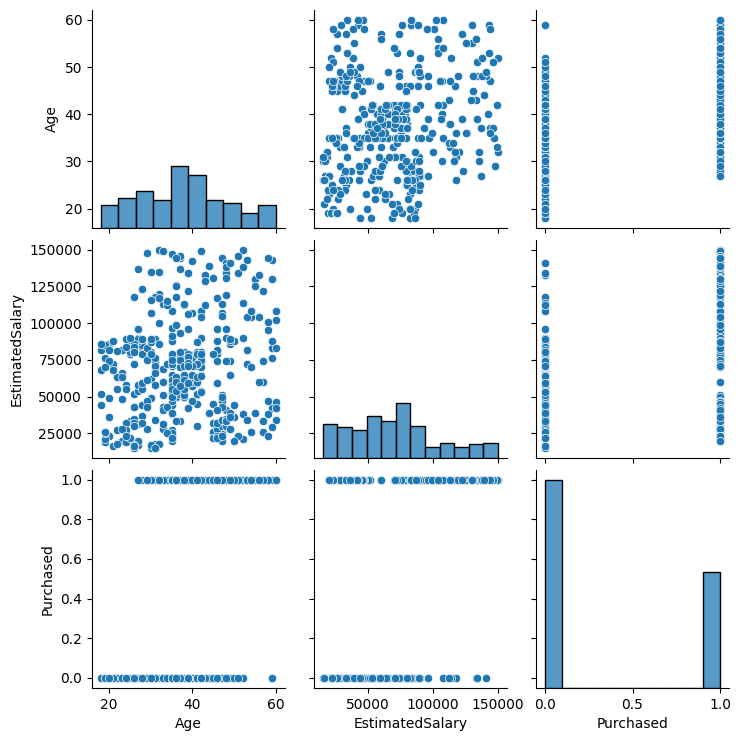

In [6]:
sns.pairplot(df)
plt.show()

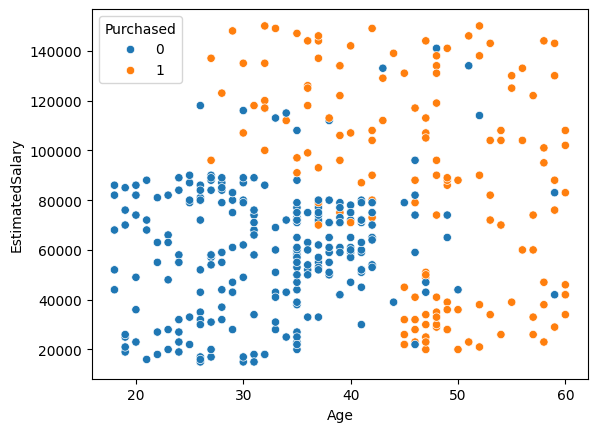

In [7]:
sns.scatterplot(x='Age', y='EstimatedSalary',data=df , hue='Purchased')
plt.show()

In [8]:
x= df.iloc[:,:-1]
y=df['Purchased']

In [11]:
from sklearn.preprocessing import StandardScaler
SS= StandardScaler()

In [12]:
df[['Age','EstimatedSalary']]= SS.fit_transform(df[['Age','EstimatedSalary']])

In [14]:
df.head()

,Age,EstimatedSalary,Purchased
0,-1.781797,-1.490046,0
1,-0.253587,-1.460681,0
2,-1.113206,-0.785290,0
3,-1.017692,-0.374182,0
4,-1.781797,0.183751,0


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [35]:
KN = KNeighborsClassifier(n_neighbors=4)
KN.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=4)

In [36]:
KN.score(x_train,y_train)*100, KN.score(x_test,y_test)*100


(84.6875, 82.5)

In [37]:
for i in range(1,25):
  KNN=KNeighborsClassifier(n_neighbors=i)
  KNN.fit(x_train,y_train)
  print(i,KNN.score(x_train,y_train)*100, KNN.score(x_test,y_test)*100)


1 99.6875 82.5
2 89.0625 78.75
3 88.4375 78.75
4 84.6875 82.5
5 87.1875 83.75
6 85.625 87.5
7 84.6875 87.5
8 83.125 86.25
9 83.75 86.25
10 82.1875 83.75
11 86.25 88.75
12 84.0625 88.75
13 83.125 87.5
14 81.25 86.25
15 79.375 83.75
16 80.0 86.25
17 80.9375 85.0
18 81.25 85.0
19 82.8125 87.5
20 80.625 85.0
21 80.3125 87.5
22 80.3125 85.0
23 82.5 87.5
24 80.3125 83.75


In [38]:
# check boundries

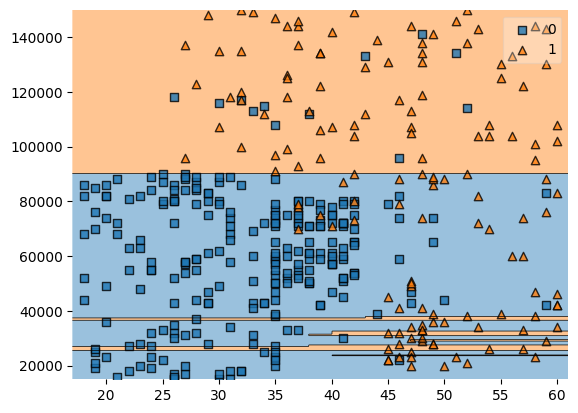

In [40]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=KNN)
plt.show()
